# Group Programming Project Report for

*   **Mohammad Meymani 3785776**
*   **Michael Odartei Mills 3789215**






> # PART 1

We implemented *Adaboost with ID3*, *ANN with backpropagation* and *Naïve Bayes* three algorithms using Python and applied each of **our implementations** to the given data sets.


## Implementation 1: Adaboost with ID3 as the base learner on data set Letter Recognition:
*   Data set: https://archive.ics.uci.edu/dataset/59/letter+recognition

###Step 1: Import Required Libraries

In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from collections import Counter

In [ ]:
from ucimlrepo import fetch_ucirepo

###Step 2: Load and Clean the Data
We use the Letter Recognition dataset from the UCI Machine Learning Repository and load it into a Pandas DataFrame.

In [ ]:
letter_recognition = fetch_ucirepo(id=59)
dataFrame = pd.DataFrame(data=letter_recognition.data.features, columns=letter_recognition.data.features.columns)
dataFrame['target'] = letter_recognition.data.targets
dataFrame[10:20]

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,target
10,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7,X
11,6,13,4,7,4,6,7,6,3,10,7,9,5,9,5,8,O
12,4,9,6,7,6,7,8,6,2,6,5,11,4,8,7,8,G
13,6,9,8,6,9,7,8,6,5,7,5,8,8,9,8,6,M
14,5,9,5,7,6,6,11,7,3,7,3,9,2,7,5,11,R
15,6,9,5,4,3,10,6,3,5,10,5,7,3,9,6,9,F
16,3,4,4,3,2,8,7,7,5,7,6,8,2,8,3,8,O
17,7,10,5,5,2,6,8,6,8,11,7,11,2,8,5,9,C
18,6,11,6,8,5,6,11,5,6,11,9,4,3,12,2,4,T
19,2,2,3,3,1,10,6,3,6,12,4,9,0,7,1,7,J


###Step 3: Perform Data Analysis
Some simple analysis to understand the dataset.

In [ ]:
print(dataFrame.isnull().sum())
print(dataFrame.describe())
dataFrame['target'].value_counts()

x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
target    0
dtype: int64
              x-box         y-box         width         high         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              x-bar         y-bar         x2bar         y2bar         xybar  \
c

,count
target,
U,813
D,805
P,803
T,796
M,792
A,789
X,787
Y,786
N,783


###Step 4: Split the Data into Training and Testing Sets
We split the dataset into training and testing sets, with 80% of the data used for training and 20% for testing.

In [ ]:
x = dataFrame.drop('target', axis=1)
y = dataFrame['target']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(16000, 16)
(4000, 16)
(16000,)
(4000,)


In [ ]:
Counter(dataFrame['width'].values)

Counter({3: 1994,
         6: 3641,
         5: 4262,
         4: 3816,
         13: 6,
         8: 1418,
         2: 1285,
         7: 1946,
         11: 91,
         12: 39,
         9: 679,
         1: 385,
         10: 237,
         0: 195,
         15: 2,
         14: 4})

###Step 5: Implement AdaBoost with ID3 as base learner
Now, we implement the classifier

In [ ]:
#function below calculates entropy for a single attribute on a single node
def entropy(data,attribute):
    res = 0
    frequencyDictionary = Counter(data[attribute].values)
    for key in frequencyDictionary:
        probability = frequencyDictionary[key]/len(data)
        res -= probability * math.log2(probability)
    return res

#function below calculates the information game using the parent and a single child for a single node
def information_gain(data,feature,target_attribute):
    parent_entropy = entropy(data, target_attribute)
    frequencyDictionary = Counter(data[feature].values)
    weighted_entropy = 0
    for key, value in frequencyDictionary.items():
        subset = data[data[feature] == key]
        weighted_entropy += (value/len(data))*entropy(subset, target_attribute)
    return parent_entropy - weighted_entropy

#ID3 algorithm to build the tree
def id3(data, features, target_attribute, height=3):
    target_values = data[target_attribute].values
    #If all target values are the same, return the label
    if len(set(target_values)) == 1:
        return target_values[0]
    #At the laef we choose the most repeated value
    if len(features) == 0 or height == 0:
        return Counter(target_values).most_common(1)[0][0]
    #Choosing a feature with the highest information gain
    best_feature = max(features, key=lambda feature: information_gain(data, feature, target_attribute))
    #Our tree is at first has the best feature as the parent and there are no children
    tree = {best_feature: {}}
    #Split the dataset on the best feature and build the subtree
    unique_values = set(data[best_feature])
    remaining_features = [feature for feature in features if feature != best_feature]
    for value in unique_values:
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = id3(subset, remaining_features, target_attribute, height-1)
    return tree

#ID3 classifier to choose instance label
def classify(tree, instance):
    if type(tree) is not dict:
        return tree
    feature = next(iter(tree))
    value = instance[feature]
    if value not in tree[feature]:
        return None
    return classify(tree[feature][value], instance)

#Adaboost algorithm
def adaboost(data, features, target_attribute, iterations):
    #at first, every sample has the same weights and the value is 1/n
    weights = [1 / len(data)] * len(data)
    classifiers = []
    alphas = []
    for i in range(iterations):
        # Build a weighted dataset by sampling rows based on their weights
        weighted_data = data.sample(n=len(data), weights=weights, replace=True)
        #creating tree instance
        tree = id3(weighted_data, features, target_attribute, height=5)
        print(tree)
        #error calculation
        error = 0
        for j, row in data.iterrows():
            prediction = classify(tree, row)
            if prediction != row[target_attribute]:
                error += weights[j]
        # Calculate the alpha (influence of this classifier)
        if error == 0:
            error = 1e-10  # Avoid division by zero
        alpha = 0.5 * math.log((1 - error) / error)
        #updating the weights
        for j, row in data.iterrows():
            prediction = classify(tree, row)
            if prediction == row[target_attribute]:
                weights[j] *= math.exp(-alpha)
            else:
                weights[j] *= math.exp(alpha)
        #normalizing the weights
        weights_sum = sum(weights)
        for j in range(len(weights)):
          weights[j] = weights[j]/weights_sum
        classifiers.append(tree)
        alphas.append(alpha)
    return classifiers, alphas

#Adaboost Classification
def adaboost_classify(classifiers, alphas, instances):
    predictions = []
    for index in instances.index:
        instance = instances.loc[index].to_dict()
        result = {}
        for alpha, classifier in zip(alphas, classifiers):
          instance_prediction = classify(classifier,instance)
          if instance_prediction not in result:
            result[instance_prediction] = 0
          result[instance_prediction] += alpha
        prediction = max(result,key=result.get)
        predictions.append(prediction)
    return predictions

###Step 6: Train the AbaBoost with ID3 Tree Classifier
Now, we train the AbaBoost with ID3 Tree Classifier using the training data.

In [ ]:
#training the model
classifiers, alphas = adaboost(dataFrame, x.columns.tolist(), "target", iterations=3)

{'x-ege': {0: {'xybar': {0: 'L', 1: 'L', 2: 'L', 3: {'x-bar': {10: 'Y', 3: 'L', 4: 'L', 5: 'L'}}, 4: {'y-bar': {5: 'S', 6: 'S', 7: 'S', 8: 'S', 11: 'Y', 14: 'T', 15: 'T'}}, 5: {'y-bar': {5: 'S', 6: {'width': {3: 'E', 4: 'S', 5: 'S', 6: 'S'}}, 7: 'S', 8: 'S', 9: 'S', 10: 'S', 11: 'Y', 14: 'T', 15: 'T'}}, 6: {'y-bar': {3: 'L', 4: 'L', 5: {'x-box': {3: 'L', 4: 'I', 6: 'I', 7: 'I'}}, 6: 'E', 7: 'S', 8: 'S', 10: 'T', 11: 'Y', 12: 'T', 13: 'T', 14: 'T', 15: 'T'}}, 7: {'y-ege': {0: {'y-bar': {7: 'I', 12: 'Y', 13: 'T', 14: 'T', 15: 'T'}}, 1: 'I', 2: {'y-bar': {3: 'L', 4: 'L', 5: 'L', 7: 'I'}}, 3: {'xy2br': {7: 'I', 8: 'I', 9: 'I', 10: 'L', 11: 'L', 13: 'C', 14: 'C'}}, 4: {'x-box': {1: 'C', 2: 'C', 3: 'I', 4: 'I', 5: 'I', 6: 'I', 7: 'I'}}, 5: 'E', 6: 'E', 7: 'E', 8: {'x-bar': {8: 'Z', 3: 'E', 4: 'E', 7: 'Z'}}, 9: 'Z', 11: 'Z', 12: 'Z'}}, 8: {'y-bar': {3: 'L', 4: 'L', 5: 'L', 7: 'Z', 8: {'y-box': {8: 'Z', 9: 'Z', 6: 'E', 7: 'Z'}}, 11: 'Y', 13: 'T', 14: 'T', 15: 'T'}}, 9: {'y-bar': {3: 'L', 4: 'L

###Step 7: Make Predictions on Test Data
Once the model is trained, we can use it to make predictions on the testing set.

In [ ]:
#testing the model
yprediction = adaboost_classify(classifiers, alphas, xtest)
print(ytest == yprediction)
print(sum(ytest == yprediction))
print('Accuracy:',sum(ytest == yprediction)/len(ytest))

5031     True
1884     True
2658     True
5431     True
3091     True
         ... 
12540    True
7113     True
6831     True
10192    True
13202    True
Name: target, Length: 4000, dtype: bool
3965
Accuracy: 0.99125



##   Implementation 2: ANN with backpropagation on data set Breast Cancer:

*   Data set: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic


In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import math
from ucimlrepo import fetch_ucirepo
from sklearn import preprocessing

In [ ]:
BCWD_Dataset = fetch_ucirepo(id = 17)

In [ ]:
x = BCWD_Dataset.data.features
y = BCWD_Dataset.data.targets

In [ ]:
print(x)

     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.241

In [ ]:
print(y)

    Diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]


In [ ]:
#normalizing the data
#ss = preprocessing.StandardScaler()
#x_normalized = ss.fit_transform(x)
#print(x_normalized)
x_normalized = preprocessing.normalize(x)
print(x_normalized)

[[7.92541486e-03 4.57286305e-03 5.40989964e-02 ... 1.16920795e-04
  2.02695018e-04 5.23808686e-05]
 [8.66575595e-03 7.48616836e-03 5.59882822e-02 ... 7.83583182e-05
  1.15852352e-04 3.75024596e-05]
 [9.36668268e-03 1.01087865e-02 6.18419883e-02 ... 1.15596947e-04
  1.71873157e-04 4.16624718e-05]
 ...
 [1.16438847e-02 1.96964025e-02 7.59658259e-02 ... 9.94640269e-05
  1.55579134e-04 5.48525170e-05]
 [9.23020523e-03 1.31418408e-02 6.27743569e-02 ... 1.18738077e-04
  1.83125480e-04 5.55604587e-05]
 [2.31098880e-02 7.30820427e-02 1.42709515e-01 ... 0.00000000e+00
  8.55006294e-04 2.09626935e-04]]


In [ ]:
#we need to convert the output to numerical values for classification calculations
y_numerical = pd.DataFrame(data = {'Diagnosis':range(len(y))})
for i in range(len(y)):
    if y['Diagnosis'][i] == 'B':
        y_numerical['Diagnosis'][i] = 0
    else:
        y_numerical['Diagnosis'][i] = 1

<ipython-input-8-2989ca02f994>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  y_numerical['Diagnosis'][i] = 1
<ipython-input-8-2989ca02f994>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting val

In [ ]:
print(y_numerical)

     Diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
564          1
565          1
566          1
567          1
568          0

[569 rows x 1 columns]


In [ ]:
BCWD_Metadata = BCWD_Dataset.metadata
BCWD_Variables = BCWD_Dataset.variables

In [ ]:
#sigmoid over a single value of data
def sigmoid(x):
    return 1/(1+(math.e)**-x)
#sigmoid derivation over a single value of data
def sigmoid_derivation(x):
    return sigmoid(x)*(1-sigmoid(x))
#adding the sigmoid function to numpy library
sigmoid = np.frompyfunc(sigmoid,1,1)
sigmoid_derivation = np.frompyfunc(sigmoid_derivation,1,1)

In [ ]:
#Relu over a single value of data
def relu(x):
    if x <= 0:
        return 0
    return x
#relu derivation over a single value of data
def relu_derivation(x):
    if x <= 0:
        return 0
    return 1
#adding the relu function to numpy library
relu = np.frompyfunc(relu,1,1)
relu_derivation = np.frompyfunc(relu_derivation,1,1)

In [ ]:
x_train,x_test = x_normalized[:500],x_normalized[500:]
y_train,y_test = y_numerical[:500],y_numerical[500:]

In [ ]:
class BCWDClassifier():
    def __init__(self,inputNumber,hiddenLayerNeuronsNumber,outputNeuronsNumber,learningRate):
        self.learningRate = learningRate
        self.Winput2hidden = np.random.normal(size = (inputNumber,hiddenLayerNeuronsNumber))
        self.Whidden2output = np.random.normal(size = (hiddenLayerNeuronsNumber,outputNeuronsNumber))
    def forward(self,x):
        hiddenNeurons = sigmoid(x @ self.Winput2hidden)
        outputNeurons = sigmoid(hiddenNeurons @ self.Whidden2output)
        return outputNeurons.reshape(1,len(outputNeurons)),hiddenNeurons.reshape(1,len(hiddenNeurons)),self.Winput2hidden,self.Whidden2output
    def updateWeights(self,derivedWinput2hidden,derivedWhidden2output):
        self.Winput2hidden += self.learningRate * derivedWinput2hidden
        self.Whidden2output += self.learningRate * derivedWhidden2output

In [ ]:
def calculateGradient(x,w1,w2,h,err):
    derivedWinput2hidden = x.reshape(len(x),1) @ (w2.T * sigmoid_derivation(x @ w1))* sigmoid_derivation(h @ w2) * err
    derivedWhidden2output = err * sigmoid_derivation(h @ w2) * h
    return derivedWinput2hidden.astype('float64'),derivedWhidden2output.T.astype('float64')

In [ ]:
bcwdc = BCWDClassifier(len(x_train[0]),100,1,0.01)

In [ ]:
for i in range(500):
    for j in range(len(x_train)):
        o,h,w1,w2 = bcwdc.forward(x_train[i])
        dw1,dw2 = calculateGradient(x_train[j],w1,w2,h,y_train.iloc[j][0]-o)
        bcwdc.updateWeights(dw1,dw2)

<ipython-input-17-c573ff2c99ce>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dw1,dw2 = calculateGradient(x_train[j],w1,w2,h,y_train.iloc[j][0]-o)


In [ ]:
total = len(y_test)
correct = 0
for i in range(total):
    o,_,_,_ = bcwdc.forward(x_test[i])
    if o < 0.5:
        o = 0
    else:
        o = 1
    if o == y_test.iloc[i][0]:
        correct += 1
print('accuracy:',correct/total)

accuracy: 0.782608695652174


<ipython-input-18-4bd19f78b2a7>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if o == y_test.iloc[i][0]:


## Implementation 3: Naïve Bayes on dataset Car Evaluation:
* Data set: http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
carEvaluationDataset = fetch_ucirepo(id = 19)

In [ ]:
dataFeatures = carEvaluationDataset.data.features
dataTargets = carEvaluationDataset.data.targets

In [ ]:
print(dataFeatures)

     buying  maint  doors persons lug_boot safety
0     vhigh  vhigh      2       2    small    low
1     vhigh  vhigh      2       2    small    med
2     vhigh  vhigh      2       2    small   high
3     vhigh  vhigh      2       2      med    low
4     vhigh  vhigh      2       2      med    med
...     ...    ...    ...     ...      ...    ...
1723    low    low  5more    more      med    med
1724    low    low  5more    more      med   high
1725    low    low  5more    more      big    low
1726    low    low  5more    more      big    med
1727    low    low  5more    more      big   high

[1728 rows x 6 columns]


In [ ]:
print(dataTargets)

      class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


In [ ]:
print(dataTargets.value_counts())

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
#dividing the train and the test sections
xtrain,xtest,ytrain,ytest = train_test_split(dataFeatures,dataTargets,train_size = 0.8,shuffle = True)

In [ ]:
print(xtrain)

     buying  maint  doors persons lug_boot safety
1248    med    low      4       2      big    low
760    high    low      2       2      med    med
1055    med   high  5more       2    small   high
1188    med    low      2       2    small    low
63    vhigh  vhigh      4       4    small    low
...     ...    ...    ...     ...      ...    ...
1295    med    low  5more    more      big   high
1095    med    med      2       4      big    low
568    high   high      3       2    small    med
179   vhigh   high      4       4      big   high
318   vhigh    med  5more    more      med    low

[1382 rows x 6 columns]


In [ ]:
print(ytrain)

      class
1248  unacc
760   unacc
1055  unacc
1188  unacc
63    unacc
...     ...
1295  vgood
1095  unacc
568   unacc
179   unacc
318   unacc

[1382 rows x 1 columns]


In [ ]:
print(xtest)

     buying  maint  doors persons lug_boot safety
815    high    low      4       2      med   high
291   vhigh    med      4    more      med    low
859    high    low  5more    more      med    med
1597    low    med  5more       2      med    med
1072    med   high  5more    more    small    med
...     ...    ...    ...     ...      ...    ...
833    high    low      4    more      med   high
1537    low    med      2    more      big    med
351   vhigh    low      3       2    small    low
319   vhigh    med  5more    more      med    med
503    high  vhigh      4       4      big   high

[346 rows x 6 columns]


In [ ]:
print(ytest)

      class
815   unacc
291   unacc
859     acc
1597  unacc
1072  unacc
...     ...
833     acc
1537   good
351   unacc
319     acc
503   unacc

[346 rows x 1 columns]


In [ ]:
#calculating probability of each class
p_unacc = sum(ytrain['class'] == 'unacc')/len(ytrain)
p_acc = sum(ytrain['class'] == 'acc')/len(ytrain)
p_good = sum(ytrain['class'] == 'good')/len(ytrain)
p_vgood = sum(ytrain['class'] == 'vgood')/len(ytrain)

In [ ]:
print(p_unacc,p_acc,p_good,p_vgood)

0.6975397973950795 0.223589001447178 0.03907380607814761 0.03979739507959479


In [ ]:
#function below normalizes word counts to the form of probability distribution
def normalize_counts(myDictionary):
    for key in myDictionary:
        keyNum = 0
        totalSum = 0
        for i in myDictionary[key]:
            keyNum += 1
            totalSum += myDictionary[key][i]
        for i in myDictionary[key]:
            myDictionary[key][i] = ((myDictionary[key][i]+1)/(totalSum+keyNum))
    return myDictionary

In [ ]:
#function below claculates probability of each word according to each class
def calculate_word_probability(data,target,column):
    result = dict()
    for i in range(len(data)):
        if data[column].iloc[i] in result:
            result[data[column].iloc[i]][target['class'].iloc[i]] += 1
        else:
            result[data[column].iloc[i]] = {'unacc':0,'acc':0,'good':0,'vgood':0}
    #we need to make the result form a probability distribution
    result = normalize_counts(result)
    return result

In [ ]:
print(calculate_word_probability(xtrain,ytrain,'buying'))

{'med': {'unacc': 0.6065573770491803, 'acc': 0.2677595628415301, 'good': 0.06284153005464481, 'vgood': 0.06284153005464481}, 'high': {'unacc': 0.7360703812316716, 'acc': 0.25806451612903225, 'good': 0.002932551319648094, 'vgood': 0.002932551319648094}, 'vhigh': {'unacc': 0.8289855072463768, 'acc': 0.16521739130434782, 'good': 0.002898550724637681, 'vgood': 0.002898550724637681}, 'low': {'unacc': 0.5994152046783626, 'acc': 0.2046783625730994, 'good': 0.09649122807017543, 'vgood': 0.09941520467836257}}


In [ ]:
#training the model
probability_dict = {}
for i in xtrain:
    probability_dict[i] = calculate_word_probability(xtrain,ytrain,i)

In [ ]:
print(probability_dict)

{'buying': {'med': {'unacc': 0.6065573770491803, 'acc': 0.2677595628415301, 'good': 0.06284153005464481, 'vgood': 0.06284153005464481}, 'high': {'unacc': 0.7360703812316716, 'acc': 0.25806451612903225, 'good': 0.002932551319648094, 'vgood': 0.002932551319648094}, 'vhigh': {'unacc': 0.8289855072463768, 'acc': 0.16521739130434782, 'good': 0.002898550724637681, 'vgood': 0.002898550724637681}, 'low': {'unacc': 0.5994152046783626, 'acc': 0.2046783625730994, 'good': 0.09649122807017543, 'vgood': 0.09941520467836257}}, 'maint': {'low': {'unacc': 0.6, 'acc': 0.21791044776119403, 'good': 0.12238805970149254, 'vgood': 0.05970149253731343}, 'high': {'unacc': 0.7162534435261708, 'acc': 0.24517906336088155, 'good': 0.0027548209366391185, 'vgood': 0.03581267217630854}, 'vhigh': {'unacc': 0.8352941176470589, 'acc': 0.1588235294117647, 'good': 0.0029411764705882353, 'vgood': 0.0029411764705882353}, 'med': {'unacc': 0.6151685393258427, 'acc': 0.27247191011235955, 'good': 0.042134831460674156, 'vgood': 

In [ ]:
#calculating post priority probability
def calculate_final_probability(data,columns,index,classification):
    result = 1
    for i in columns:
        result *= probability_dict[i][data[i].iloc[index]][classification]
    return result

In [ ]:
#testing the model
correct = 0
for i in range(len(xtest)):
    prediction = 'unacc'
    unacc_result = p_unacc * calculate_final_probability(xtest,xtest.columns,i,'unacc')
    acc_result = p_acc * calculate_final_probability(xtest,xtest.columns,i,'acc')
    good_result = p_good * calculate_final_probability(xtest,xtest.columns,i,'good')
    vgood_result = p_vgood * calculate_final_probability(xtest,xtest.columns,i,'vgood')
    myList = [unacc_result,acc_result,good_result,vgood_result]
    if np.argmax(myList) == 0:
        prediction = 'unacc'
    elif np.argmax(myList) == 1:
        prediction = 'acc'
    elif np.argmax(myList) == 2:
        prediction = 'good'
    else:
        prediction = 'vgood'
    if prediction == ytest['class'].iloc[i]:
        correct += 1
print('accuracy:',correct/len(xtest))

accuracy: 0.7109826589595376




> # PART 2

We conducted experiments on the given deep learning models using data set MNIST: https://www.kaggle.com/datasets/hojjatk/mnist-dataset.

1. Deep Fully-connected Feedforward ANN. In your experiments, you should try (a) different structures (layers, number of neurons, etc.) (b) different activation functions, such as Relu, Sigmoid. Report and discuss your experimental results.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import torchvision.datasets as datasets
import torchvision.transforms
import matplotlib.pyplot as plt

In [ ]:
MNIST_Data_Train = datasets.MNIST(root = '',train = True,transform = torchvision.transforms.ToTensor(),download = True)
MNIST_Data_Test = datasets.MNIST(root = '',train = False,transform = torchvision.transforms.ToTensor(),download = True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4608275.18it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 59259.60it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1269354.03it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4321807.80it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
print(MNIST_Data_Train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(MNIST_Data_Test)

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
image0,label0 = MNIST_Data_Train[0]

In [ ]:
print(image0)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
print(label0)

5


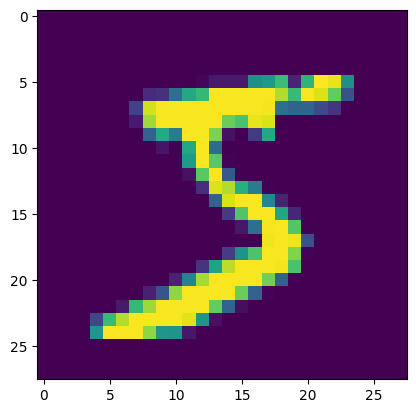

In [ ]:
plt.imshow(image0.reshape(28,28))

In [ ]:
trainLoader = DataLoader(MNIST_Data_Train,batch_size = 64,shuffle = True)

In [ ]:
testLoader = DataLoader(MNIST_Data_Test,batch_size = 64,shuffle = True)

In [ ]:
for i in trainLoader:
    print(i[0])
    print(i[1])
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
#one hidden layered class with sigmoid as activation function
class ArtificialNeuralNetworkV01(nn.Module):
    def __init__(self,inputNeuronsNumber,hiddenNeuronsNumber,outputNeuronsNumber):
        super().__init__()
        self.hiddenLayer = nn.Linear(inputNeuronsNumber,hiddenNeuronsNumber)
        self.activation1 = nn.Sigmoid()
        self.outputLayer = nn.Linear(hiddenNeuronsNumber,outputNeuronsNumber)
        self.activation2 = nn.LogSoftmax(dim = 1)
    def forward(self,x):
        h = self.activation1(self.hiddenLayer(x))
        o = self.activation2(self.outputLayer(h))
        return o

In [ ]:
annv01_TestingFunctionality = ArtificialNeuralNetworkV01(28*28,200,10)

In [ ]:
print(annv01_TestingFunctionality)

ArtificialNeuralNetworkV01(
  (hiddenLayer): Linear(in_features=784, out_features=200, bias=True)
  (activation1): Sigmoid()
  (outputLayer): Linear(in_features=200, out_features=10, bias=True)
  (activation2): LogSoftmax(dim=1)
)


In [ ]:
print(MNIST_Data_Train[0][0].reshape(-1,28,28))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
print(MNIST_Data_Train[0][0].shape)

torch.Size([1, 28, 28])


In [ ]:
print(annv01_TestingFunctionality.forward(MNIST_Data_Train[0][0].reshape(-1,28*28)))

tensor([[-2.3155, -2.0433, -2.9055, -2.4292, -2.5589, -2.7110, -1.9238, -2.7036,
         -1.7102, -2.3952]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
#creating our model
annv01 = ArtificialNeuralNetworkV01(28*28,100,10)

In [ ]:
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(annv01.parameters(),lr = 0.01)
for i in range(100):
    for x,y in trainLoader:
        optimizer.zero_grad()
        yPrediction = annv01.forward(x.reshape(-1,28*28))
        loss = criterion(yPrediction,y)
        loss.backward()
        optimizer.step()

In [ ]:
#testing our model
correctPredictions = 0
total = 0
for x,y in testLoader:
    predictions = annv01.forward(x.reshape(-1,28*28))
    correctPredictions += sum(torch.argmax(predictions,dim = 1) == y)
    total += len(y)
print('Accuracy for annv01:',correctPredictions/total)

Accuracy for annv01: tensor(0.9708)


In [ ]:
#one hidden layered class with relu as activation function
class ArtificialNeuralNetworkV02(nn.Module):
    def __init__(self,inputNeuronsNumber,hiddenNeuronsNumber,outputNeuronsNumber):
        super().__init__()
        self.hiddenLayer = nn.Linear(inputNeuronsNumber,hiddenNeuronsNumber)
        self.activation1 = nn.ReLU()
        self.outputLayer = nn.Linear(hiddenNeuronsNumber,outputNeuronsNumber)
        self.activation2 = nn.LogSoftmax(dim = 1)
    def forward(self,x):
        h = self.activation1(self.hiddenLayer(x))
        o = self.activation2(self.outputLayer(h))
        return o
#creating our model
annv02 = ArtificialNeuralNetworkV02(28*28,100,10)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(annv02.parameters(),lr = 0.01)
for i in range(100):
    for x,y in trainLoader:
        optimizer.zero_grad()
        yPrediction = annv02.forward(x.reshape(-1,28*28))
        loss = criterion(yPrediction,y)
        loss.backward()
        optimizer.step()
#testing our model
correctPredictions = 0
total = 0
for x,y in testLoader:
    predictions = annv02.forward(x.reshape(-1,28*28))
    correctPredictions += sum(torch.argmax(predictions,dim = 1) == y)
    total += len(y)
print('Accuracy for annv02:',correctPredictions/total)

Accuracy for annv02: tensor(0.9728)


In [ ]:
#two hidden layered class with sigmoid as activation function
class ArtificialNeuralNetworkV03(nn.Module):
    def __init__(self,inputNeuronsNumber,hiddenNeurons1Number,hiddenNeurons2Number,outputNeuronsNumber):
        super().__init__()
        self.hiddenLayer1 = nn.Linear(inputNeuronsNumber,hiddenNeurons1Number)
        self.activation1 = nn.Sigmoid()
        self.hiddenLayer2 = nn.Linear(hiddenNeurons1Number,hiddenNeurons2Number)
        self.activation2 = nn.Sigmoid()
        self.outputLayer = nn.Linear(hiddenNeurons2Number,outputNeuronsNumber)
        self.activation3 = nn.LogSoftmax(dim = 1)
    def forward(self,x):
        h1 = self.activation1(self.hiddenLayer1(x))
        h2 = self.activation2(self.hiddenLayer2(h1))
        o = self.activation3(self.outputLayer(h2))
        return o
#creating our model
annv03 = ArtificialNeuralNetworkV03(28*28,100,150,10)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(annv03.parameters(),lr = 0.01)
for i in range(100):
    for x,y in trainLoader:
        optimizer.zero_grad()
        yPrediction = annv03.forward(x.reshape(-1,28*28))
        loss = criterion(yPrediction,y)
        loss.backward()
        optimizer.step()
#testing our model
correctPredictions = 0
total = 0
for x,y in testLoader:
    predictions = annv03.forward(x.reshape(-1,28*28))
    correctPredictions += sum(torch.argmax(predictions,dim = 1) == y)
    total += len(y)
print('Accuracy for annv03:',correctPredictions/total)

Accuracy for annv03: tensor(0.9747)


In [ ]:
#two hidden layered class with relu as activation function
class ArtificialNeuralNetworkV04(nn.Module):
    def __init__(self,inputNeuronsNumber,hiddenNeurons1Number,hiddenNeurons2Number,outputNeuronsNumber):
        super().__init__()
        self.hiddenLayer1 = nn.Linear(inputNeuronsNumber,hiddenNeurons1Number)
        self.activation1 = nn.ReLU()
        self.hiddenLayer2 = nn.Linear(hiddenNeurons1Number,hiddenNeurons2Number)
        self.activation2 = nn.ReLU()
        self.outputLayer = nn.Linear(hiddenNeurons2Number,outputNeuronsNumber)
        self.activation3 = nn.LogSoftmax(dim = 1)
    def forward(self,x):
        h1 = self.activation1(self.hiddenLayer1(x))
        h2 = self.activation2(self.hiddenLayer2(h1))
        o = self.activation3(self.outputLayer(h2))
        return o
#creating our model
annv04 = ArtificialNeuralNetworkV04(28*28,100,150,10)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(annv04.parameters(),lr = 0.01)
for i in range(100):
    for x,y in trainLoader:
        optimizer.zero_grad()
        yPrediction = annv04.forward(x.reshape(-1,28*28))
        loss = criterion(yPrediction,y)
        loss.backward()
        optimizer.step()
#testing our model
correctPredictions = 0
total = 0
for x,y in testLoader:
    predictions = annv04.forward(x.reshape(-1,28*28))
    correctPredictions += sum(torch.argmax(predictions,dim = 1) == y)
    total += len(y)
print('Accuracy for annv04:',correctPredictions/total)

Accuracy for annv04: tensor(0.9676)


In [ ]:
#testing one hidden layered model (Sigmoid as Activation) with more neurons and different learning rate
annv01_moreHiddenNeurons = ArtificialNeuralNetworkV01(28*28,300,10)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(annv01_moreHiddenNeurons.parameters(),lr = 0.001)
for i in range(100):
    for x,y in trainLoader:
        optimizer.zero_grad()
        yPrediction = annv01_moreHiddenNeurons.forward(x.reshape(-1,28*28))
        loss = criterion(yPrediction,y)
        loss.backward()
        optimizer.step()
#testing our model
correctPredictions = 0
total = 0
for x,y in testLoader:
    predictions = annv01_moreHiddenNeurons.forward(x.reshape(-1,28*28))
    correctPredictions += sum(torch.argmax(predictions,dim = 1) == y)
    total += len(y)
print('Accuracy for annv01_moreHiddenNeurons:',correctPredictions/total)

Accuracy for annv01_moreHiddenNeurons: tensor(0.9818)


In [ ]:
#testing one hidden layered model (Relu as Activation) with more neurons and different learning rate
annv02_moreHiddenNeurons = ArtificialNeuralNetworkV02(28*28,300,10)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(annv02_moreHiddenNeurons.parameters(),lr = 0.001)
for i in range(100):
    for x,y in trainLoader:
        optimizer.zero_grad()
        yPrediction = annv02_moreHiddenNeurons.forward(x.reshape(-1,28*28))
        loss = criterion(yPrediction,y)
        loss.backward()
        optimizer.step()
#testing our model
correctPredictions = 0
total = 0
for x,y in testLoader:
    predictions = annv02_moreHiddenNeurons.forward(x.reshape(-1,28*28))
    correctPredictions += sum(torch.argmax(predictions,dim = 1) == y)
    total += len(y)
print('Accuracy for annv02_moreHiddenNeurons:',correctPredictions/total)

Accuracy for annv02_moreHiddenNeurons: tensor(0.9822)


2. CNN. In your experiments, you should try different CNN structures, filters, and hyperparameters. Report and discuss your experimental results.

In [ ]:
import torch
from torch import nn #importing neural network
from torch.utils.data import DataLoader #for making batches and shuffeling the data
from torchvision.datasets import MNIST #MNIST dataset
from torchvision.transforms import ToTensor #transform the data to tensor matrix

In [ ]:
trainSet = MNIST(root = '',train = True,download = True, transform = ToTensor())
testSet = MNIST(root = '',train = False,download = True, transform = ToTensor())

In [ ]:
print(trainSet)

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(testSet)

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
trainLoader = DataLoader(trainSet,batch_size = 64,shuffle = True)
testLoader = DataLoader(testSet,batch_size = 64,shuffle = True)

In [ ]:
#First version of CNN class
class CNN_V01(nn.Module):
    def __init__(self,activation_function = 'sigmoid',learning_rate = 0.01):
        super().__init__()
        self.learning_rate = learning_rate
        self.convolutionalLayer1 = nn.Conv2d(in_channels = 1,out_channels = 20,kernel_size = 3,stride = 1) #balck & white so input channel is one
        self.convolutionalLayer2 = nn.Conv2d(in_channels = 20,out_channels = 40,kernel_size = 3,stride = 1)
        self.forward1 = nn.Linear(40*5*5,90)
        #default activation function is sigmoid
        self.activation1 = nn.Sigmoid()
        #if we set activation function value to relu then we use relu
        if activation_function == 'relu':
            self.activation1 = nn.ReLU()
        self.forward2 = nn.Linear(90,50)
        #default activation function is sigmoid
        self.activation2 = nn.Sigmoid()
        #if we set activation function value to relu then we use relu
        if activation_function == 'relu':
            self.activation2 = nn.ReLU()
        self.outputLayer = nn.Linear(50,10)
        self.log_softmax = nn.LogSoftmax(dim = 1)
    def forward(self,x):
        #convolutional layer1 and max pooling
        x = self.convolutionalLayer1(x)
        x = nn.functional.max_pool2d(x,2,2)
        #convolution layer2 and max pooling
        x = self.convolutionalLayer2(x)
        x = nn.functional.max_pool2d(x,2,2)
        #forward layers
        x = x.reshape(-1,40*5*5)
        x = self.activation1(self.forward1(x))
        x = self.activation2(self.forward2(x))
        x = self.outputLayer(x)
        x = self.log_softmax(x)
        return x

In [ ]:
#creating model instance relu as activation function and learning rate of 0.01
cnn1 = CNN_V01('relu',0.01)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn1.parameters(),lr = cnn1.learning_rate)
for epoch in range(20):
    for x,y in trainLoader:
        optimizer.zero_grad()
        y_prediction = cnn1.forward(x)
        loss = criterion(y_prediction,y)
        loss.backward()
        optimizer.step()
#testing the model accuracy
total = 0
correct = 0
for x,y in testLoader:
    total += len(y)
    y_prediction = cnn1.forward(x)
    correct += sum(torch.argmax(y_prediction,dim = 1) == y)
print('Accuracy for cnn1:',correct/total)

Accuracy for cnn1: tensor(0.9642)


In [ ]:
#creating model instance relu as activation function and learning rate of 0.001
cnn2 = CNN_V01('relu',0.001)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn2.parameters(),lr = cnn2.learning_rate)
for epoch in range(20):
    for x,y in trainLoader:
        optimizer.zero_grad()
        y_prediction = cnn2.forward(x)
        loss = criterion(y_prediction,y)
        loss.backward()
        optimizer.step()
#testing the model accuracy
total = 0
correct = 0
for x,y in testLoader:
    total += len(y)
    y_prediction = cnn2.forward(x)
    correct += sum(torch.argmax(y_prediction,dim = 1) == y)
print('Accuracy for cnn2:',correct/total)

Accuracy for cnn2: tensor(0.9892)


In [ ]:
#creating model instance sigmoid as activation function and learning rate of 0.01
cnn3 = CNN_V01('sigmoid',0.01)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn3.parameters(),lr = cnn3.learning_rate)
for epoch in range(20):
    for x,y in trainLoader:
        optimizer.zero_grad()
        y_prediction = cnn3.forward(x)
        loss = criterion(y_prediction,y)
        loss.backward()
        optimizer.step()
#testing the model accuracy
total = 0
correct = 0
for x,y in testLoader:
    total += len(y)
    y_prediction = cnn3.forward(x)
    correct += sum(torch.argmax(y_prediction,dim = 1) == y)
print('Accuracy for cnn3:',correct/total)

Accuracy for cnn3: tensor(0.9232)


In [ ]:
#creating model instance sigmoid as activation function and learning rate of 0.001
cnn4 = CNN_V01('sigmoid',0.001)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn4.parameters(),lr = cnn4.learning_rate)
for epoch in range(20):
    for x,y in trainLoader:
        optimizer.zero_grad()
        y_prediction = cnn4.forward(x)
        loss = criterion(y_prediction,y)
        loss.backward()
        optimizer.step()
#testing the model accuracy
total = 0
correct = 0
for x,y in testLoader:
    total += len(y)
    y_prediction = cnn4.forward(x)
    correct += sum(torch.argmax(y_prediction,dim = 1) == y)
print('Accuracy for cnn4:',correct/total)

Accuracy for cnn4: tensor(0.9895)


In [ ]:
#second version of cnn (simple architecture)
class CNN_V02(nn.Module):
    def __init__(self,activation_function = 'sigmoid',learning_rate = 0.01):
        super().__init__()
        self.learning_rate = learning_rate
        self.convolutionalLayer = nn.Conv2d(in_channels = 1,out_channels = 50,kernel_size = 3,stride = 1)
        self.forward1 = nn.Linear(50*13*13,60)
        #default activation function is sigmoid
        self.activation1 = nn.Sigmoid()
        #if we set activation function value to relu then we use relu
        if activation_function == 'relu':
            self.activation1 = nn.ReLU()
        self.outputLayer = nn.Linear(60,10)
        self.log_softmax = nn.LogSoftmax(dim = 1)
    def forward(self,x):
        x = nn.functional.max_pool2d(self.convolutionalLayer(x),2,2)
        x = x.reshape(-1,50*13*13)
        x = self.activation1(self.forward1(x))
        x = self.log_softmax(x)
        return x

In [ ]:
#creating model instance relu as activation function and learning rate of 0.01
cnn5 = CNN_V02('relu',0.01)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn5.parameters(),lr = cnn5.learning_rate)
for epoch in range(20):
    for x,y in trainLoader:
        optimizer.zero_grad()
        y_prediction = cnn5.forward(x)
        loss = criterion(y_prediction,y)
        loss.backward()
        optimizer.step()
#testing the model accuracy
total = 0
correct = 0
for x,y in testLoader:
    total += len(y)
    y_prediction = cnn5.forward(x)
    correct += sum(torch.argmax(y_prediction,dim = 1) == y)
print('Accuracy for cnn5:',correct/total)

Accuracy for cnn5: tensor(0.8516)


In [ ]:
#creating model instance relu as activation function and learning rate of 0.01
cnn6 = CNN_V02('relu',0.001)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn6.parameters(),lr = cnn6.learning_rate)
for epoch in range(20):
    for x,y in trainLoader:
        optimizer.zero_grad()
        y_prediction = cnn6.forward(x)
        loss = criterion(y_prediction,y)
        loss.backward()
        optimizer.step()
#testing the model accuracy
total = 0
correct = 0
for x,y in testLoader:
    total += len(y)
    y_prediction = cnn6.forward(x)
    correct += sum(torch.argmax(y_prediction,dim = 1) == y)
print('Accuracy for cnn6:',correct/total)

Accuracy for cnn6: tensor(0.8819)


In [ ]:
#creating model instance sigmoid as activation function and learning rate of 0.01
cnn7 = CNN_V02('sigmoid',0.01)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn7.parameters(),lr = cnn7.learning_rate)
for epoch in range(20):
    for x,y in trainLoader:
        optimizer.zero_grad()
        y_prediction = cnn7.forward(x)
        loss = criterion(y_prediction,y)
        loss.backward()
        optimizer.step()
#testing the model accuracy
total = 0
correct = 0
for x,y in testLoader:
    total += len(y)
    y_prediction = cnn7.forward(x)
    correct += sum(torch.argmax(y_prediction,dim = 1) == y)
print('Accuracy for cnn7:',correct/total)

Accuracy for cnn7: tensor(0.0980)


In [ ]:
#creating model instance sigmoid as activation function and learning rate of 0.001
cnn8 = CNN_V02('sigmoid',0.001)
#training the model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn8.parameters(),lr = cnn8.learning_rate)
for epoch in range(20):
    for x,y in trainLoader:
        optimizer.zero_grad()
        y_prediction = cnn8.forward(x)
        loss = criterion(y_prediction,y)
        loss.backward()
        optimizer.step()
#testing the model accuracy
total = 0
correct = 0
for x,y in testLoader:
    total += len(y)
    y_prediction = cnn8.forward(x)
    correct += sum(torch.argmax(y_prediction,dim = 1) == y)
print('Accuracy for cnn8:',correct/total)

Accuracy for cnn8: tensor(0.9721)
